# Hackathon 2

In the first exercise, you will develop a model for estimating the cooling/heating load indexes of a building from its characteristics. These indexes serve as reference to adapt the power of air conditioning systems. In the second exercise, you will forecast the hourly electric power consumption in Spain. Electricity being not storable, predicting the electric consumption is a crucial matter for energy producers. You will develop an autoregressive model for this purpose. 

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Louise Monteyne 32202000

Part. 2: Gabrielle Deplae 19082000

Part. 3: Albane Denis 23872000

Part. 4: Liza Denis 30902000

Part. 5: Maxime Devillet 08661900

Part. 6: Anass Gallass 02652201


## Regression

When designing a building, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. Architects and building designers need information about the characteristics of the building and of the conditioned space. For this reason, we  investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.
The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

Features: RelativeCompactness, SurfaceArea ,WallArea, RoofArea, OverallHeight, Orientation, GlazingArea, GlazingAreaDistribution.

Prediction: HeatingLoad, CoolingLoad



---
1) Report useful statistics for each variables (mean, std, heatmap of correlations,...)

Relative_Compactness: Mean = 0.7641666666666667    Standard Deviation = 0.10577747587475192
Surface_Area: Mean = 671.7083333333334    Standard Deviation = 88.08611605586836
Wall_Area: Mean = 318.5    Standard Deviation = 43.6264814379949
Roof_Area: Mean = 176.60416666666666    Standard Deviation = 45.16595022292048
Overall_Height: Mean = 5.25    Standard Deviation = 1.7511404367453496
Orientation: Mean = 3.5    Standard Deviation = 1.1187625870603635
Glazing_Area: Mean = 0.234375    Standard Deviation = 0.13322056291470777
Glazing_Area_Distribution: Mean = 2.8125    Standard Deviation = 1.5509596642247505
Heating_Load: Mean = 22.307200520833334    Standard Deviation = 10.090195732006158
Cooling_Load: Mean = 24.58776041666667    Standard Deviation = 9.513305562326169


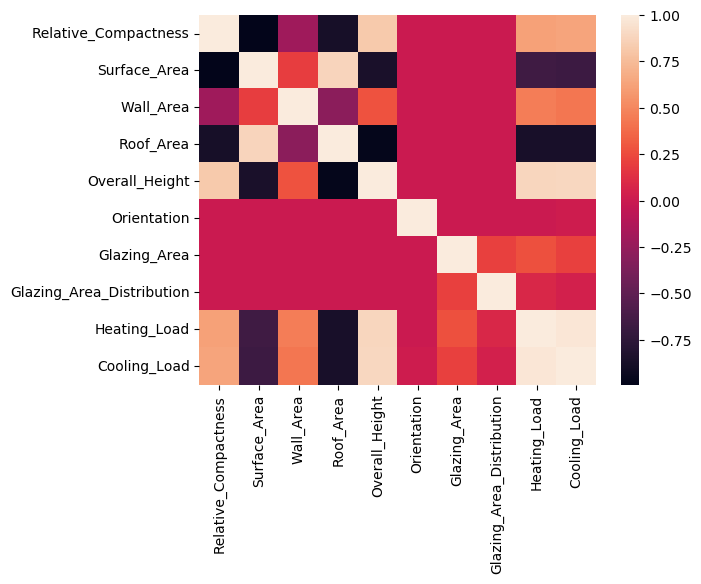

In [179]:
#code here
import seaborn as sb
import statsmodels as sm
import pandas as pd
import numpy as np

data_hc = pd.read_csv("Data_heating_cooling.csv", sep = ',')

Relative_Compactness = data_hc["Relative_Compactness"]
Surface_Area = data_hc["Surface_Area"]
Wall_Area = data_hc["Wall_Area"]
Roof_Area = data_hc["Roof_Area"]
Overall_Height = data_hc["Overall_Height"]
Orientation = data_hc["Orientation"]
Glazing_Area = data_hc["Glazing_Area"]
Glazing_Area_Distribution = data_hc["Glazing_Area_Distribution"]
Heating_Load = data_hc["Heating_Load"]
Cooling_Load = data_hc["Cooling_Load"]

def mean (var):
    return var.mean()

def std (var):
    return var.std()

corr = data_hc.corr()
sb.heatmap(corr)

lst = [Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load]
for var in lst:
    print(str(var.name) + ": Mean = " + str(mean(var)) + "    Standard Deviation = " + str(std(var)))



Comments

We have separated our file ("Data_heating_cooling.csv") by variable and we have calculated the mean and the standard deviation for each one. We have also done a heatmap of correlations between each of the variables where we can see with colors if 2 of them are linked. Each variable has a correlation with itself of 1 , which is quite logical. A positive correlation means that when 1 variable increase, the other one increase too. On the contrary, if the correlation is negative, if one variable increase, the other one tends to decrease. We can see that the orientation has no correlation with other variables. The Glazing Area and the Glazing Area Distribution don't have so much correlation with others except with each other and the Glazing Area has a little correlation with the Heating Load and the Cooling Load. The others like Respective Compactness, Surface Area, Wall Area, Roof Area and Overall Height have differents correlation with each others and with the Heating and the Cooling Load.

---
2)	Add a constant term (intercept) and perform a linear regression of the variable CoolingLoad on all other explanatory variables. Use  the library statsmodels.

i. Report the F statistics and R2: interpret them. 

ii. Analyze the t-statistics and p-values of each coefficient of regression.

Are all coefficients significant at 95%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).


In [180]:
#code here
import statsmodels.api as sm

X = data_hc.drop(['Orientation','Glazing_Area_Distribution','Roof_Area','Heating_Load','Cooling_Load'],axis=1)
X= pd.concat ([X,pd.get_dummies(Orientation, prefix = 'O', drop_first=True),pd.get_dummies(Glazing_Area_Distribution,prefix = 'G', drop_first= True)],axis =1)

X = sm.add_constant(X)
model = sm.OLS(Cooling_Load, X)

results= model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     471.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:50:57   Log-Likelihood:                -1970.3
No. Observations:                 768   AIC:                             3969.
Df Residuals:                     754   BIC:                             4034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   96.3701 

Comments

R² has to be between 0 and 1. It is the proportion of the variance and it says if a model suits well our dataset. The closer it is to 1, the better. Here we have R² = 0.890 which is close to 1 so the model fits well. Then, we got for the F statistics 471.3. The F statistic is a test used to determine whether among a group of independent variables, at least one can explain a significant part of the variation of the independent variable. If it is "too small", the possibility that the CoolingLoad and other explanatory variables are linear must be rejected. As our F statistic is 473.1, we can say that it is not "too small" and therefore the CoolingLoad and the others explanatory variables are linear. 
the t statistics are student test and this is used to study and compare data from different populations. This measures the differences between the means of 2 groups or a group compared to a standard value. It tells us how likely it is that the observed differences are due to chance. If this probability is very low, the difference is said to be significant. Here we can see that the probabilities are very low
The coefficient are significant at 95% if the p-value is lower than 0.05. Here we can see that O_3, O_4 and O_5 have p-value that are greater than 0.05.

---
3)	Remove non-significant coefficients except the intercept (e.g. with  𝛼  5%) and run again the regression. What do you notice when you compare the R2, log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


In [181]:
#code here
# Pour savoir si un coefficient est significatif ou non il faut regarder le 'p-value'
# si p-value>0.05 le coefficient n'est pas significatif et si p-value<0.05 le coefficient est significatif

X_bis= X.drop(['O_3', 'O_4', 'O_5'],axis=1)

results_bis = sm.OLS(Cooling_Load, X_bis).fit()

print(results_bis.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:50:57   Log-Likelihood:                -1972.4
No. Observations:                 768   AIC:                             3967.
Df Residuals:                     757   BIC:                             4018.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   96.3533 

Comments

- AIC is an estimator of prediction error. The model with the lowest AIC offers the best fit. The AIC value is a useful way to determine which regression model fits a dataset the best, but it doesn't quantify how well the model fits the data.
The AIC value is 3967 here so it's lower than the AIC value found at the previous question (3969). 
- To determine if a model fits a dataset well we can use R^2. R^2 can range from 0 to 1 and is the prportion of the variance. The closer to unity, the better is the model.
When we remove non-significant coefficients, we obtain R^2 = 0,89 exactly the same value found at the previous question. 
- BIC is a metric that is used to compare the goodness of fit of different regression models. The model with the lowest BIC value is the model that best fits the data.
The BIC = 4018 here is lower compared to the BIC value (4034) found at the previous question. 
- The log-likelihood value of a regression is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset. 
The log-likelihood value found is -1972.4 when we remove non-significant coefficients which is lower than -1970.3 found at the previous questions. 

In conclusion, when we remove non-significant coefficients (except the intercept), the AIC and the BIC values become lower, the R^2 value stay the same but the log-likelihood value is lower than the model without removing those coefficients. The lower AIC and BIC values indicate that the second model fits better the dataset than the one without removing non-significant coefficients but the log-likelihood is lower in the second model than in the first one which indicates that the first model offers the best fit. The R^2 stay the same between the two models so it doesn't give any information.

## Auto-regressive model

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure (see https://arxiv.org/abs/1906.05433).  The file “Data_energy_load.csv” contains 4 years of electrical consumption  for Spain in MW/h.  This was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.

File format:

Date: dd-mm-yy, Hour : from 0 to 23. Weekday: from 1 (Monday)  to 7 (Sunday). Load: consumption in MW/h. Lm1: consumption 1h ago, Lm2: consumption 2h ago,… Lm14: consumption 14h ago

1)	Load the dataset and convert dates in datetime format (you can use the package datetime). Plot the time series of consumption, what do you observe?

C:\Users\Liza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Liza\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Liza\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Liza\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.p

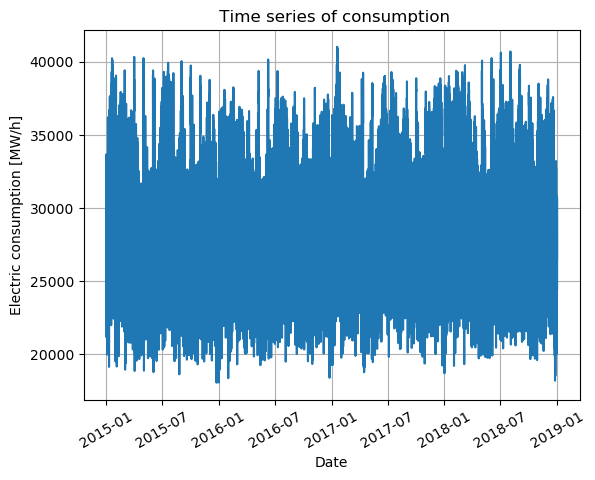

In [182]:
#code here
from datetime import datetime
import matplotlib.pyplot as plt

data_en = pd.read_csv("Data_energy_load.csv",sep = ';')
date=data_en['Date']
hour = data_en['Hour']

format_data = "%d-%m-%y %H"


for i in range(len(date)):
    datatime=date[i] +" "+ str(hour[i])
    date[i]=datetime.strptime(datatime,format_data)

load=data_en['Load']

plt.plot(date,load)
plt.grid(True)
plt.xlabel('Date')
plt.xticks(rotation = 30,)
plt.ylabel('Electric consumption [MW/h]')
plt.title(' Time series of consumption')
plt.show()

Comments

The graph shows the electric consumption between January 2015 and January 2019. We observe that this consumption stay more or less constant between 20000 MW/h and 40000 MW/h during the 4 years. The maximum value is about 41250 MW/h and the minimum value is about 17500 MW/h.

---
2) We will regress the electric consumption (‘Load’) on the following covariates ‘Weekday’, ‘Hour’, ‘Lm1’, ‘Lm2’,…,’Lm14’. Plot the following graphs:

•	Average electric consumption per day (y axis) versus weekday (x axis)

•	Average electric consumption per hour(y axis) versus hour (x axis)

Based on these graphs, do you think that it is a good idea to regress linearly the consumption on variables ‘Hour’ and ‘Weekday’? 


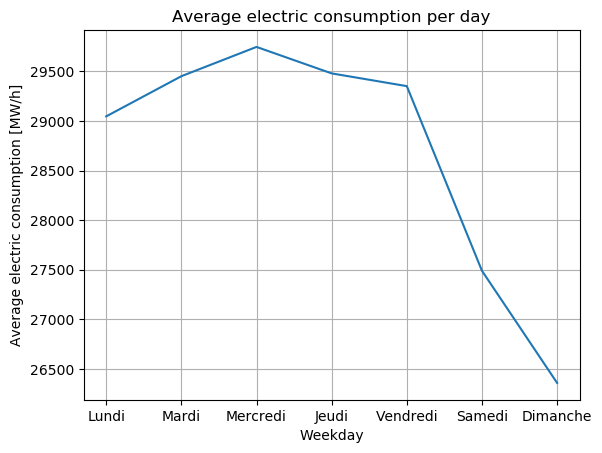

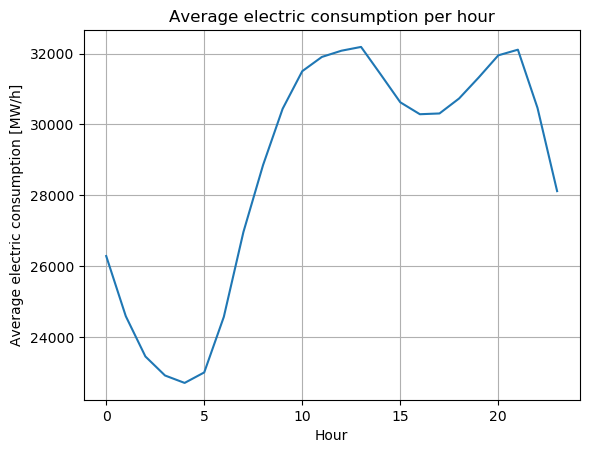

In [183]:
#code here
groups = data_en.groupby(data_en.Weekday)
Xaverage = pd.DataFrame(columns=[1,2,3,4,5,6,7], index=[0])
for i in range(1,7):
    Xaverage[i]= groups.get_group(i+1)['Load'].mean()
Xaverage[7]=groups.get_group(1)['Load'].mean()
plt.plot(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],Xaverage.transpose())
plt.grid(True)
plt.xlabel('Weekday')
plt.ylabel('Average electric consumption [MW/h]')
plt.title('Average electric consumption per day')
plt.show()

groups = data_en.groupby(data_en.Hour)
Xaverage = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], index=[0])
X13=groups.get_group(13)['Load']#utilise dans 2.6
X11=groups.get_group(11)['Load']#utilise dans 2.6
for i in range(24):
    Xaverage[i]= groups.get_group(i)['Load'].mean()
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],Xaverage.transpose())
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Average electric consumption [MW/h]')
plt.title('Average electric consumption per hour')
plt.show()

Comments
We see that the consumer of electricity depends on the production activities of the producer. This may seem obvious but you can see it on the graph. We can therefore observe that the average production is maximum during the day of the week and gradually drops during the night and the weekend.

---
3) We will slightly transform the dataset. We first add a constant column for the regression (column of ones). You also convert the variable ‘Hour’ into 23 (and not 24!) binary variables H1,…H23. You next convert the variable ‘Weekday’ into 6 (and not 7) variables W2,…,W7. Use the command get_dummies(.) from pandas. Why do we remove H0 and W1? Why do we do this conversion?

---

In [184]:
#code here

Hour = data_en['Hour']
Weekday = data_en['Weekday']
X = data_en.drop(['Date','Hour', 'Weekday','Load'], axis=1)
X = pd.concat([X, pd.get_dummies(Hour, prefix='H', drop_first=True), pd.get_dummies(Weekday, prefix='W', drop_first=True)],axis =1)
X = sm.add_constant(X)
print(X)


       const      Lm1      Lm2      Lm3      Lm4      Lm5      Lm6      Lm7  \
0        1.0  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0   
1        1.0  27070.0  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0   
2        1.0  24935.0  27070.0  26798.0  29031.0  29571.0  29014.0  28020.0   
3        1.0  23214.0  24935.0  27070.0  26798.0  29031.0  29571.0  29014.0   
4        1.0  22540.0  23214.0  24935.0  27070.0  26798.0  29031.0  29571.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
35035    1.0  29592.0  26738.0  26449.0  27009.0  27988.0  28636.0  28982.0   
35036    1.0  30653.0  29592.0  26738.0  26449.0  27009.0  27988.0  28636.0   
35037    1.0  29735.0  30653.0  29592.0  26738.0  26449.0  27009.0  27988.0   
35038    1.0  28071.0  29735.0  30653.0  29592.0  26738.0  26449.0  27009.0   
35039    1.0  25801.0  28071.0  29735.0  30653.0  29592.0  26738.0  26449.0   

           Lm8      Lm9  ...  H_20  H_21  H_22  H_2

Comments

We remove H0 and W1 to avoid redundancy.

---
4) Split the dataset in

•	a training set with observations from 02-01-15 up to 01-12-2018 (included)

•	a test (or validation) set with observations from 02-12-2018 up to 31-12-2018.


In [185]:
#code here

minDate = datetime.fromisoformat('2015-01-02')
maxDate = datetime.fromisoformat('2018-12-02')
training_set = X[(date>=minDate)&(date<maxDate)]
minDate = datetime.fromisoformat('2018-12-02')
maxDate = datetime.fromisoformat('2019-01-01')
test_set = X[(date>=minDate)&(date<maxDate)]


---
If we denote by L(t) the consumption at time t, the model that we want to develop is 
$$L(t) = cst + \sum_{k=1}^{14} a_k L(t-k) +\sum_{k=2}^{7} b_k W_k + \sum_{k=1}^{23} c_k H_k    $$

o	Estimate this model with statsmodels on the training set. 

o	How would you judge the quality of the predictive model?

o	Compute the Mean Absolute Error (MAE) between predicted and real consumptions.



In [186]:
#code here

minDate = datetime.fromisoformat('2015-01-02')
maxDate = datetime.fromisoformat('2018-12-02')
load_training_set=load[(date>=minDate)&(date<maxDate)]
result = sm.OLS(load_training_set, training_set).fit()
print(result.summary())

Load_prediction = result.predict(training_set)
mae = abs(Load_prediction-load_training_set).mean()
print('\n Mean Absolute Error: ' +str(mae))

                            OLS Regression Results                            
Dep. Variable:                   Load   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.296e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:51:12   Log-Likelihood:            -2.7363e+05
No. Observations:               34320   AIC:                         5.473e+05
Df Residuals:                   34276   BIC:                         5.477e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.5367     49.042      7.759      0.0

Comments
First, we split the dataset as requested in a training set with observations from January 2, 2015 through December 1, 2018 and a test set with observations from 2018. Then we have estimate this model of the consumption at time t (L(t)) with statsmodels. We can evaluate the quality of the predictive model with the value of R². The closer it is to 1, the better is the model. Here we can see that R² is equal to 0.976 which is closer to 1 than it is to 0. So we can say that the predictive model is a good representation of the reality. At the end of this question, we have compute the Mean Absolute Error between predicted and real consumptions. This Mean Absolute Error is equal to 444.52, that represents an error of less than 2% of the values that we found for the Load (between 25000 and 40000).

5) Use this model on the test set to forecast the electric consumption.

o	Compare on a graph, the forecast to  real consumptions on the given period. Plot also the errors of prediction.

o	Compute the MAE on the test set and the R2. Is the forecast reliable?

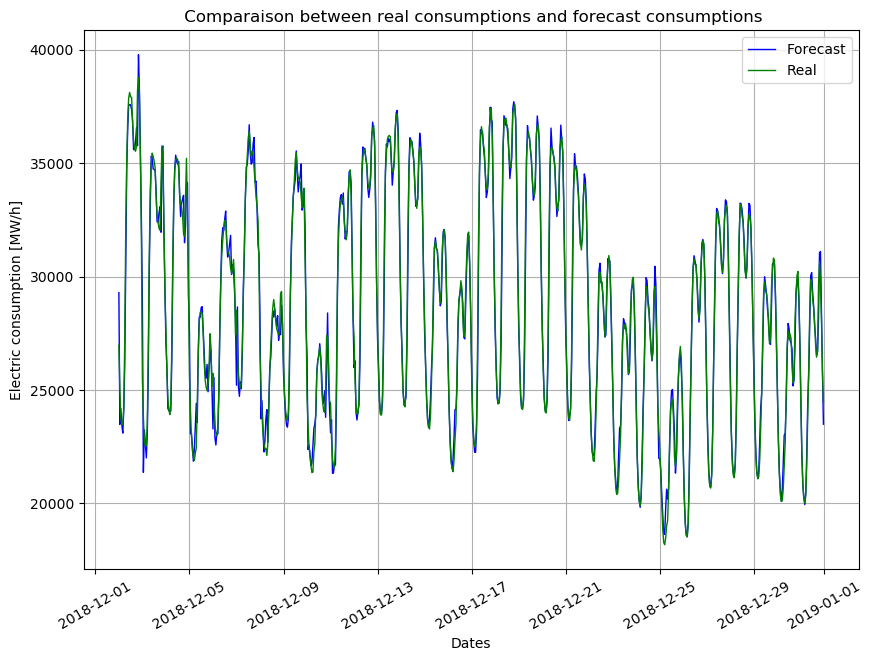

R2 = 0.9857186637253309
Mean Absolute Error: 390.9134216117199


C:\Users\Liza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


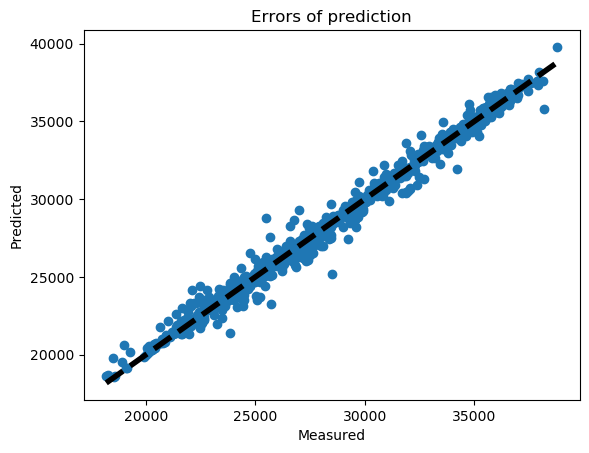

In [191]:
#code here
import statsmodels.api as sm
import matplotlib.pyplot as plt

#real consumptions
minDate = datetime.fromisoformat('2018-12-02')
maxDate = datetime.fromisoformat('2019-01-01')
date_bis=date[(date>=minDate)&(date<maxDate)]
load_test_set=load[(date>=minDate)&(date<maxDate)]

#forecast consumptions
result = sm.OLS(load_test_set, test_set).fit()
Load_prediction = result.predict(test_set)


#comparaison on a graph
plt.figure(figsize=(10,7))
plt.plot(date_bis, Load_prediction, 'b',linewidth=1)
plt.plot(date_bis,load_test_set, 'g' ,linewidth=1)
plt.legend(['Forecast','Real'])
plt.grid(True)
plt.xlabel('Dates')
plt.xticks(rotation = 30,)
plt.ylabel('Electric consumption [MW/h]')
plt.title(' Comparaison between real consumptions and forecast consumptions')
plt.show()

#error of prediction on a graph
fig,ax = plt.subplots()
ax.scatter(load_test_set, Load_prediction)
ax.plot([load_test_set.min(), load_test_set.max()], [load_test_set.min(), load_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Errors of prediction')
fig.show()

#compute MAE and the R2
print('R2 = ' + str(result.rsquared))
mae = abs(Load_prediction-load_test_set).mean()
print('Mean Absolute Error: ' +str(mae))



Comments

6) We want to check that the average consumption at 11h is significantly different (at 95%) from the average consumption at 13h. Perform a statistical test (explain which stat you use) and report the stat value, the pivot value(s) and the p-value.

In [ ]:
#code here

import numpy as np

Xb1=Xaverage[11]#moyenne à 11h
Xb2=Xaverage[13]#moyenne à 13h
n=len(X11)#le X11 et X13 est defini à la question 2.2
S1    = np.std(X11,ddof=1) 
S2    = np.std(X13,ddof=1)
Spool = np.sqrt(((n-1)*S1**2+(n-1)*S2**2)/(n+n-2))
Tx    = (Xb1-Xb2)/(Spool*np.sqrt(1/n+1/n))
# we compare it to percentiles of a t distribution
alpha = 0.05
t_l   = sc.t.ppf(q=alpha/2,df=n+n-2)
t_u   = sc.t.ppf(q=1-alpha/2,df=n+n-2)
pval = 2*sc.t.cdf(-np.abs(Tx),df=n+n-2)

print("t_val = " + str(Tx[0]))
print("p-value = " + str(pval))
print("pivot values : t_l =  " + str(t_l) + " and t_u = " + str(t_u))


t_val = -2.1686214215184214
p-value = [0.03019197]
pivot values : t_l =  -1.9607772946161888 and t_u = 1.9607772946161883


'""\n#avec statsmodels\nimport statsmodels.stats.weightstats as sm\n\nX1    = sm.DescrStatsW(X11)\nX2    = sm.DescrStatsW(X13)\nn=len(X11)\n\nTtest= sm.CompareMeans(X1,X2)\nprint(Ttest.tconfint_diff(usevar=\'pooled\'))\nprint(Ttest.summary(usevar=\'pooled\'))\nprint(Ttest.ttest_ind(usevar=\'pooled\',value=0))\n'

Comments

We used a T test because we want to test statistically significant difference in the means between 2 groups.

For the pivot given that t_l and t_u are the perfect inverses, we can conclude that the Gaussian curve is linear. Then when we consider p-val = 0.03 we can see that it is < 0.05 which means that we reject the null hypothesis.

7) The test of question 5 requires that variances are equal. Test if this assumption holds (95% confidence level). Report  the stat value, the pivot value (s).

In [194]:
#code here

S1    = np.std(X11,ddof=1) 
S2    = np.std(X13,ddof=1)
Tx     =S1**2/S2**2
# we compare it to percentiles of a t distribution
alpha = 0.05
f_u   = sc.f.ppf(q=1-alpha,dfn=n-1, dfd=n-1)
f_l   = sc.f.ppf(q=1-alpha/2,dfn=n-1, dfd=n-1)
#we see that Tx is in the 2.5% and 97.5% interval of the Student's t
pval = 1-sc.f.cdf(Tx,dfn=n-1 , dfd=n-1)

print("t_val = " + str(Tx))
print("p-value = " + str(pval*2))#fois 2 car il faut le two-sided à la place de one-sided
print("pivot values : f_u = " + str(f_u) + " and f_l = " + str(f_l))



t_val = 1.0327018579534886
p-value = 0.5389240510160758
pivot values : f_u = 1.089973241382692 and f_l = 1.1081195364915295


Comments
 The p-val > 0.05 so we do not reject the null hypothesis.